# **Adding Datetime**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel("/content/Electricity.xlsx",sheet_name="Electricity Usage_9440")

In [3]:
df.head(25)

,Date,Time,Electricity (kW),Elctricity Generated (kW)
0,2022-01-01 00:00:00,00:30:00,7.8,0.000000
1,2022-01-01 00:00:00,01:30:00,8.5,0.000000
2,2022-01-01 00:00:00,02:30:00,9.4,0.000000
3,2022-01-01 00:00:00,03:30:00,11.6,0.000000
4,2022-01-01 00:00:00,04:30:00,56.1,0.000000
5,2022-01-01 00:00:00,05:30:00,62.9,0.000000
6,2022-01-01 00:00:00,06:30:00,71.5,0.000000
7,2022-01-01 00:00:00,07:30:00,87.4,-10.486470
8,2022-01-01 00:00:00,08:30:00,128.5,-84.059356
9,2022-01-01 00:00:00,09:30:00,122.4,-168.280155


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Time                       8760 non-null   object 
 2   Electricity (kW)           8760 non-null   float64
 3   Elctricity Generated (kW)  8760 non-null   float64
dtypes: float64(2), object(2)
memory usage: 273.9+ KB


Finding off-peaks

In [5]:
df.Time

0       00:30:00
1       01:30:00
2       02:30:00
3       03:30:00
4       04:30:00
          ...   
8755    19:30:00
8756    20:30:00
8757    21:30:00
8758    22:30:00
8759    23:30:00
Name: Time, Length: 8760, dtype: object

In [6]:
df = df.drop("Date",axis = 1)

In [7]:
df.head()

,Time,Electricity (kW),Elctricity Generated (kW)
0,00:30:00,7.8,0.0
1,01:30:00,8.5,0.0
2,02:30:00,9.4,0.0
3,03:30:00,11.6,0.0
4,04:30:00,56.1,0.0


In [8]:
from datetime import date, timedelta

In [9]:
sdate = date(2022,1,1)   # start date
edate = date(2023,1,1)   # end date

In [10]:
sdate

datetime.date(2022, 1, 1)

In [11]:
t = pd.date_range(sdate,edate-timedelta(days=1),freq='H')

In [12]:
rng = pd.date_range('1/1/2022 00:30:00', periods= 8760, freq='H')

In [13]:
rng

DatetimeIndex(['2022-01-01 00:30:00', '2022-01-01 01:30:00',
               '2022-01-01 02:30:00', '2022-01-01 03:30:00',
               '2022-01-01 04:30:00', '2022-01-01 05:30:00',
               '2022-01-01 06:30:00', '2022-01-01 07:30:00',
               '2022-01-01 08:30:00', '2022-01-01 09:30:00',
               ...
               '2022-12-31 14:30:00', '2022-12-31 15:30:00',
               '2022-12-31 16:30:00', '2022-12-31 17:30:00',
               '2022-12-31 18:30:00', '2022-12-31 19:30:00',
               '2022-12-31 20:30:00', '2022-12-31 21:30:00',
               '2022-12-31 22:30:00', '2022-12-31 23:30:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

In [14]:
#t = t.drop(pd.Timestamp('2020-01-01 00:00:00'))

In [15]:
df.insert (0, "Date", rng) # put Date in the first column

In [16]:
#df["Date"] =rng

In [17]:
df.head()

,Date,Time,Electricity (kW),Elctricity Generated (kW)
0,2022-01-01 00:30:00,00:30:00,7.8,0.0
1,2022-01-01 01:30:00,01:30:00,8.5,0.0
2,2022-01-01 02:30:00,02:30:00,9.4,0.0
3,2022-01-01 03:30:00,03:30:00,11.6,0.0
4,2022-01-01 04:30:00,04:30:00,56.1,0.0


In [18]:
# Sperating the date to month and year
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d')
#df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

In [19]:
df.head()

,Date,Time,Electricity (kW),Elctricity Generated (kW),month
0,2022-01-01 00:30:00,00:30:00,7.8,0.0,1
1,2022-01-01 01:30:00,01:30:00,8.5,0.0,1
2,2022-01-01 02:30:00,02:30:00,9.4,0.0,1
3,2022-01-01 03:30:00,03:30:00,11.6,0.0,1
4,2022-01-01 04:30:00,04:30:00,56.1,0.0,1


In [20]:
df = df.drop(["Time"],axis = 1)

In [21]:
df.head()

,Date,Electricity (kW),Elctricity Generated (kW),month
0,2022-01-01 00:30:00,7.8,0.0,1
1,2022-01-01 01:30:00,8.5,0.0,1
2,2022-01-01 02:30:00,9.4,0.0,1
3,2022-01-01 03:30:00,11.6,0.0,1
4,2022-01-01 04:30:00,56.1,0.0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Electricity (kW)           8760 non-null   float64       
 2   Elctricity Generated (kW)  8760 non-null   float64       
 3   month                      8760 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


# **Adding The Battery**

In [23]:
df.set_index('Date', inplace=True)

In [24]:
df.head()

,Electricity (kW),Elctricity Generated (kW),month
Date,,,
2022-01-01 00:30:00,7.8,0.0,1
2022-01-01 01:30:00,8.5,0.0,1
2022-01-01 02:30:00,9.4,0.0,1
2022-01-01 03:30:00,11.6,0.0,1
2022-01-01 04:30:00,56.1,0.0,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2022-01-01 00:30:00 to 2022-12-31 23:30:00
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Electricity (kW)           8760 non-null   float64
 1   Elctricity Generated (kW)  8760 non-null   float64
 2   month                      8760 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 273.8 KB


**Adding Net Column**

In [26]:
df["Net"]=df["Electricity (kW)"]+df["Elctricity Generated (kW)"]

**Adding Energy Used and Battery Residual**

In [27]:
Energy_Used = []
for value in df["Net"]:
    if value > 0:
        Energy_Used.append(value)
    else:
        Energy_Used.append(0)

In [28]:
Battery_Residual = []
for value in df["Net"]:
    if value < 0:
        Battery_Residual.append(abs(value))
    else:
        Battery_Residual.append(0)

In [29]:
df["Battery_Residual"] = Battery_Residual
df["Energy_Used"] = Energy_Used 

In [30]:
df.head(2)

,Electricity (kW),Elctricity Generated (kW),month,Net,Battery_Residual,Energy_Used
Date,,,,,,
2022-01-01 00:30:00,7.8,0.0,1,7.8,0.0,7.8
2022-01-01 01:30:00,8.5,0.0,1,8.5,0.0,8.5


In [31]:
df.describe()

,Electricity (kW),Elctricity Generated (kW),month,Net,Battery_Residual,Energy_Used
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,49.221781,-65.438896,6.526027,-16.217116,31.438486,15.221370
std,51.933119,91.841358,3.448048,71.524059,60.189517,23.145845
min,3.800000,-309.390713,1.000000,-283.027358,0.000000,0.000000
25%,10.000000,-130.543147,4.000000,-31.402985,0.000000,0.000000
50%,22.600000,-2.591145,7.000000,6.400000,0.000000,6.400000
75%,86.625000,0.000000,10.000000,17.600000,31.402985,17.600000
max,244.400000,0.000000,12.000000,155.629422,283.027358,155.629422


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2022-01-01 00:30:00 to 2022-12-31 23:30:00
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Electricity (kW)           8760 non-null   float64
 1   Elctricity Generated (kW)  8760 non-null   float64
 2   month                      8760 non-null   int64  
 3   Net                        8760 non-null   float64
 4   Battery_Residual           8760 non-null   float64
 5   Energy_Used                8760 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 479.1 KB


#Finding Electricity Generated

In [33]:
 PV_E  = df["Elctricity Generated (kW)"].sum()

In [34]:
print("The total electricity generated by PV is", PV_E,"KW")

The total electricity generated by PV is -573244.7319659999 KW


In [35]:
df["Electricity (kW)"].sum()

431182.80000000005

# Carbon Emission

In [36]:
ZNE = df.Net.sum()

In [37]:
if ZNE < 0:
  print("The total electricity generated by building is", ZNE,"KW")
if ZNE > 0:
  print("The total electricity consumed by building is", ZNE,"KW")
if ZNE ==0:
  print("the building is net zero")

The total electricity generated by building is -142061.931966 KW


In [38]:
Emissions = ZNE*0.384
print("The total carbon emission of the building is",Emissions," KG CO2/Kwh")

The total carbon emission of the building is -54551.781874944005  KG CO2/Kwh


#**Getting the Battery Storage from User**

In [39]:
maxcap= int(input("What is your Battery Storage?:"))

What is your Battery Storage?:1000


#**Calculating the amount of battery left in each instance**

In [40]:
k= []
n=maxcap
for i in df["Net"]:
  if n>=maxcap:
    k.append(maxcap-i)
    n=maxcap-i
  else:
    k.append(n-i)
    n=np.copy(n-i)

In [41]:
df["Battery_Left"]=k

In [42]:
hours = df.index.hour

In [43]:
df['hours']= hours

# Charging midday if less than threshold

In [44]:
dw = df.iloc[df.index.indexer_between_time('16:30', '17:00')]

In [45]:
Batt_Threshold= int(input("What is the battery red line (in KW):"))

What is the battery red line (in KW):200


In [46]:
dww = dw[dw["Battery_Left"]< Batt_Threshold]

In [47]:
dww

,Electricity (kW),Elctricity Generated (kW),month,Net,Battery_Residual,Energy_Used,Battery_Left,hours
Date,,,,,,,,
2022-01-04 16:30:00,66.0,-8.572594,1,57.427406,0.0,57.427406,153.058134,16
2022-01-05 16:30:00,53.2,-25.863110,1,27.336890,0.0,27.336890,86.951968,16
2022-01-06 16:30:00,61.3,-22.619014,1,38.680986,0.0,38.680986,-196.239652,16
2022-01-07 16:30:00,69.9,-9.325897,1,60.574103,0.0,60.574103,-941.703516,16
2022-01-08 16:30:00,55.9,-26.962739,1,28.937261,0.0,28.937261,-1032.049653,16
...,...,...,...,...,...,...,...,...
2022-12-27 16:30:00,67.6,-18.480975,12,49.119025,0.0,49.119025,-8084.208333,16
2022-12-28 16:30:00,70.3,-12.559445,12,57.740555,0.0,57.740555,-8636.191386,16
2022-12-29 16:30:00,58.0,-18.905532,12,39.094468,0.0,39.094468,-8696.048438,16


In [48]:
rows_count_1 = dww.count()[0]
rows_count_1

122

In [49]:
con = [(df["hours"] == 16) & (df["Battery_Left"] < Batt_Threshold),(df["hours"] != 16) | (df["Battery_Left"] >= Batt_Threshold)]

In [50]:
result = df['Battery_Left']+1000,0

In [51]:
df["Charging_midday"]=np.select(con,result)

In [52]:
df[df["hours"] == 16]

,Electricity (kW),Elctricity Generated (kW),month,Net,Battery_Residual,Energy_Used,Battery_Left,hours,Charging_midday
Date,,,,,,,,,
2022-01-01 16:30:00,52.5,-27.306428,1,25.193572,0.000000,25.193572,974.806428,16,0.000000
2022-01-02 16:30:00,15.8,-17.107684,1,-1.307684,1.307684,0.000000,1001.307684,16,0.000000
2022-01-03 16:30:00,14.2,-30.959845,1,-16.759845,16.759845,0.000000,1016.759845,16,0.000000
2022-01-04 16:30:00,66.0,-8.572594,1,57.427406,0.000000,57.427406,153.058134,16,1153.058134
2022-01-05 16:30:00,53.2,-25.863110,1,27.336890,0.000000,27.336890,86.951968,16,1086.951968
...,...,...,...,...,...,...,...,...,...
2022-12-27 16:30:00,67.6,-18.480975,12,49.119025,0.000000,49.119025,-8084.208333,16,-7084.208333
2022-12-28 16:30:00,70.3,-12.559445,12,57.740555,0.000000,57.740555,-8636.191386,16,-7636.191386
2022-12-29 16:30:00,58.0,-18.905532,12,39.094468,0.000000,39.094468,-8696.048438,16,-7696.048438


In [53]:
con_2 = [(df["hours"] == 16) & (df["Battery_Left"] < Batt_Threshold),(df["hours"] != 16) | (df["Battery_Left"] >= Batt_Threshold)]

In [54]:
result_2 = df['Net']-1000,df['Net']

In [55]:
df["Net_2"]=np.select(con_2,result_2)

In [56]:
df.head()

,Electricity (kW),Elctricity Generated (kW),month,Net,Battery_Residual,Energy_Used,Battery_Left,hours,Charging_midday,Net_2
Date,,,,,,,,,,
2022-01-01 00:30:00,7.8,0.0,1,7.8,0.0,7.8,992.2,0,0.0,7.8
2022-01-01 01:30:00,8.5,0.0,1,8.5,0.0,8.5,983.7,1,0.0,8.5
2022-01-01 02:30:00,9.4,0.0,1,9.4,0.0,9.4,974.3,2,0.0,9.4
2022-01-01 03:30:00,11.6,0.0,1,11.6,0.0,11.6,962.7,3,0.0,11.6
2022-01-01 04:30:00,56.1,0.0,1,56.1,0.0,56.1,906.6,4,0.0,56.1


In [57]:
aa= []
n=maxcap
for i in df["Net_2"]:
  if n>=maxcap:
    aa.append(maxcap-i)
    n=maxcap-i
  else:
    aa.append(n-i)
    n=np.copy(n-i)

In [58]:
df["battery_II"] = aa

In [59]:
df[df["hours"] == 16]

,Electricity (kW),Elctricity Generated (kW),month,Net,Battery_Residual,Energy_Used,Battery_Left,hours,Charging_midday,Net_2,battery_II
Date,,,,,,,,,,,
2022-01-01 16:30:00,52.5,-27.306428,1,25.193572,0.000000,25.193572,974.806428,16,0.000000,25.193572,974.806428
2022-01-02 16:30:00,15.8,-17.107684,1,-1.307684,1.307684,0.000000,1001.307684,16,0.000000,-1.307684,1001.307684
2022-01-03 16:30:00,14.2,-30.959845,1,-16.759845,16.759845,0.000000,1016.759845,16,0.000000,-16.759845,1016.759845
2022-01-04 16:30:00,66.0,-8.572594,1,57.427406,0.000000,57.427406,153.058134,16,1153.058134,-942.572594,1153.058134
2022-01-05 16:30:00,53.2,-25.863110,1,27.336890,0.000000,27.336890,86.951968,16,1086.951968,-972.663110,1933.893834
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27 16:30:00,67.6,-18.480975,12,49.119025,0.000000,49.119025,-8084.208333,16,-7084.208333,-950.880975,1676.818534
2022-12-28 16:30:00,70.3,-12.559445,12,57.740555,0.000000,57.740555,-8636.191386,16,-7636.191386,-942.259445,1448.016947
2022-12-29 16:30:00,58.0,-18.905532,12,39.094468,0.000000,39.094468,-8696.048438,16,-7696.048438,-960.905532,1940.142948


In [60]:
dz = df[df["battery_II"]< Batt_Threshold]

In [61]:
dzz = dz[dz["hours"] ==16]

In [62]:
dzz

,Electricity (kW),Elctricity Generated (kW),month,Net,Battery_Residual,Energy_Used,Battery_Left,hours,Charging_midday,Net_2,battery_II
Date,,,,,,,,,,,
2022-01-19 16:30:00,82.1,-29.453825,1,52.646175,0.0,52.646175,-6834.628450,16,-5834.628450,-947.353825,60.715832
2022-01-20 16:30:00,80.5,-32.919722,1,47.580278,0.0,47.580278,-8004.247609,16,-7004.247609,-952.419722,-108.903327
2022-12-08 16:30:00,83.8,-5.939989,12,77.860011,0.0,77.860011,-3928.041912,16,-2928.041912,-922.139989,151.629561


In [63]:
rows_count_2 = dzz.count()[0]

In [64]:
rows_count_2

3

In [65]:
print("The number of charing in 16:30 is",rows_count_1-rows_count_2)

The number of charing in 16:30 is 119


In [66]:
Batt_Emission = (rows_count_1-rows_count_2)*0.384

In [67]:
print("The amount of CO2 emission from charging batteries at midday is",Batt_Emission,"Kg CO2/KWh")

The amount of CO2 emission from charging batteries at midday is 45.696 Kg CO2/KWh


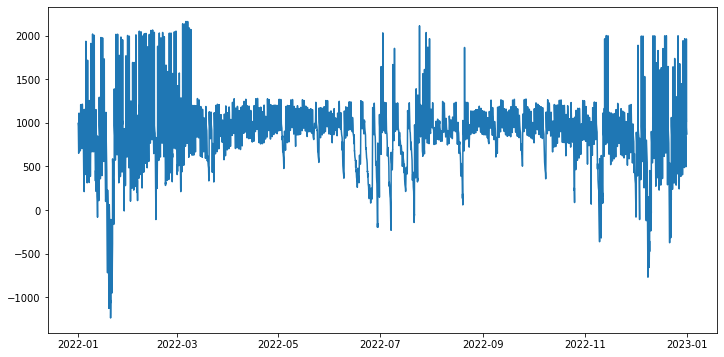

In [68]:
plt.figure(figsize=(12,6))
display(plt.plot(df["battery_II"]))

# **Charging the Battery**

In [69]:
df["Defibrillator_Value"] = np.minimum(df.battery_II,0)

In [70]:
df.Defibrillator_Value.describe()

count    8760.000000
mean       -6.373192
std        62.637537
min     -1238.382801
25%         0.000000
50%         0.000000
75%         0.000000
max         0.000000
Name: Defibrillator_Value, dtype: float64

In [71]:
df.Defibrillator_Value.min()

-1238.3828010000002

In [72]:
import math
ll = []
for i in df.Defibrillator_Value:
  if i < 0:
   #num = int(str(abs(i))[0])
   p = math.ceil(abs(i)/1000)
   #m=str(p)
   #leni = len(m)
   ll.append(p)
   #i = i+p*1000
  else:
    ll.append(0)

In [73]:
len(ll)

8760

In [74]:
df["ll"] = ll

In [75]:
df.ll.describe()

count    8760.000000
mean        0.020548
std         0.149704
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: ll, dtype: float64

In [76]:
df["Offset_Amount"] = df.ll*1000

In [77]:
df[df["ll"] == 9]

,Electricity (kW),Elctricity Generated (kW),month,Net,Battery_Residual,Energy_Used,Battery_Left,hours,Charging_midday,Net_2,battery_II,Defibrillator_Value,ll,Offset_Amount
Date,,,,,,,,,,,,,,


In [78]:
df["Battery_Recharge"] = df.Offset_Amount+df.Defibrillator_Value

In [79]:
# Count how many times the battery is being Charged
count = df["Offset_Amount"][df["Offset_Amount"]>0].count()
count

170

In [80]:
df.ll.unique()

array([0, 1, 2])

In [81]:
Times = len(df.ll.unique())-1
print("The total number of charging the battery is",Times, "times")

The total number of charging the battery is 2 times


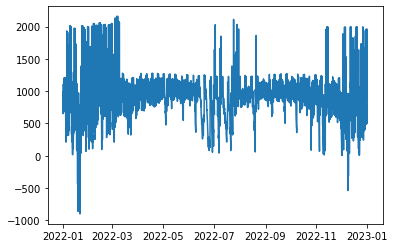

In [82]:
df["T"] = df['battery_II']+ df['Battery_Recharge']
display(plt.plot(df["T"]))

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2022-01-01 00:30:00 to 2022-12-31 23:30:00
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Electricity (kW)           8760 non-null   float64
 1   Elctricity Generated (kW)  8760 non-null   float64
 2   month                      8760 non-null   int64  
 3   Net                        8760 non-null   float64
 4   Battery_Residual           8760 non-null   float64
 5   Energy_Used                8760 non-null   float64
 6   Battery_Left               8760 non-null   float64
 7   hours                      8760 non-null   int64  
 8   Charging_midday            8760 non-null   float64
 9   Net_2                      8760 non-null   float64
 10  battery_II                 8760 non-null   float64
 11  Defibrillator_Value        8760 non-null   float64
 12  ll                         8760 non-null   int64  
 13  Offset_Amoun

In [84]:
df["T"][df["T"] < 0] = 0 # Replacing the negativevalues with zero

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
df[df['T'] > 1000]

,Electricity (kW),Elctricity Generated (kW),month,Net,Battery_Residual,Energy_Used,Battery_Left,hours,Charging_midday,Net_2,battery_II,Defibrillator_Value,ll,Offset_Amount,Battery_Recharge,T
Date,,,,,,,,,,,,,,,,
2022-01-01 12:30:00,102.0,-238.124616,1,-136.124616,136.124616,0.000000,1077.924125,12,0.000000,-136.124616,1077.924125,0.0,0,0,0.0,1077.924125
2022-01-01 13:30:00,112.8,-223.160813,1,-110.360813,110.360813,0.000000,1110.360813,13,0.000000,-110.360813,1110.360813,0.0,0,0,0.0,1110.360813
2022-01-01 14:30:00,99.7,-178.336794,1,-78.636794,78.636794,0.000000,1078.636794,14,0.000000,-78.636794,1078.636794,0.0,0,0,0.0,1078.636794
2022-01-01 15:30:00,88.0,-108.254124,1,-20.254124,20.254124,0.000000,1020.254124,15,0.000000,-20.254124,1020.254124,0.0,0,0,0.0,1020.254124
2022-01-02 11:30:00,66.7,-251.218786,1,-184.518786,184.518786,0.000000,1110.617396,11,0.000000,-184.518786,1110.617396,0.0,0,0,0.0,1110.617396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 16:30:00,56.0,-18.935125,12,37.064875,0.000000,37.064875,-8669.727766,16,-7669.727766,-962.935125,1962.935125,0.0,0,0,0.0,1962.935125
2022-12-31 13:30:00,119.0,-232.196347,12,-113.196347,113.196347,0.000000,-8620.473226,13,0.000000,-113.196347,1049.254540,0.0,0,0,0.0,1049.254540
2022-12-31 14:30:00,107.0,-178.928361,12,-71.928361,71.928361,0.000000,-8548.544865,14,0.000000,-71.928361,1071.928361,0.0,0,0,0.0,1071.928361


In [86]:
df["T"][df["T"] >1000] = 1000 # Getting rid of excessive values of battery

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
df["T"].describe()

count    8760.000000
mean      828.072313
std       212.390007
min         0.000000
25%       774.868949
50%       908.898745
75%       977.240499
max      1000.000000
Name: T, dtype: float64

In [88]:
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

In [90]:
import calendar
d = dict(enumerate(calendar.month_abbr))
df['Month'] = df['month'].map(d)

In [97]:
df["Month"]

Date
2022-01-01 00:30:00    Jan
2022-01-01 01:30:00    Jan
2022-01-01 02:30:00    Jan
2022-01-01 03:30:00    Jan
2022-01-01 04:30:00    Jan
                      ... 
2022-12-31 19:30:00    Dec
2022-12-31 20:30:00    Dec
2022-12-31 21:30:00    Dec
2022-12-31 22:30:00    Dec
2022-12-31 23:30:00    Dec
Name: Month, Length: 8760, dtype: object

***Battery Energy Left for Operation***

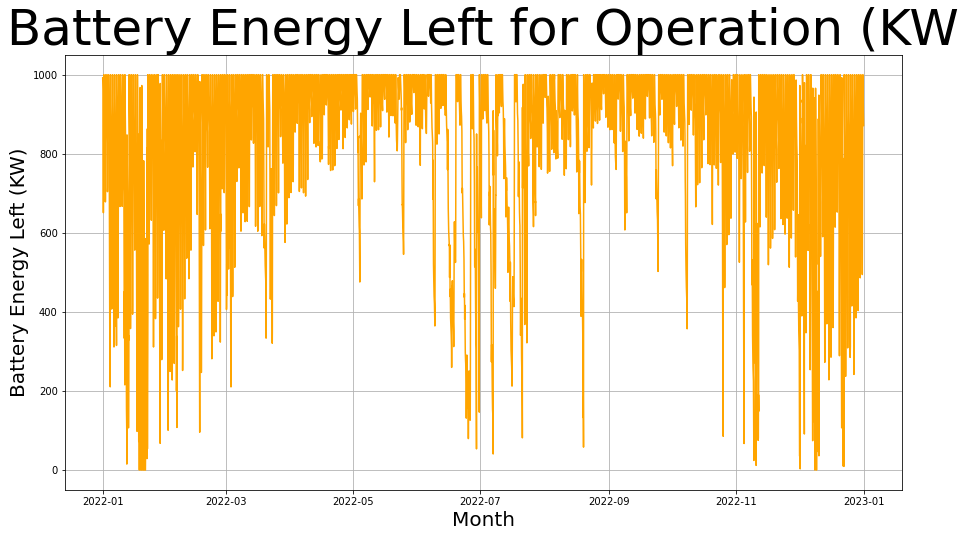

In [118]:
plt.figure(figsize=(15,8))
plt.title("Battery Energy Left for Operation (KW",fontsize=50)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Battery Energy Left (KW)",fontsize=20)
plt.grid()
display(plt.plot(df["T"],color = "orange"))

In [99]:
ds = df.reset_index()

In [100]:
ds.head()

,Date,Electricity (kW),Elctricity Generated (kW),month,Net,Battery_Residual,Energy_Used,Battery_Left,hours,Charging_midday,Net_2,battery_II,Defibrillator_Value,ll,Offset_Amount,Battery_Recharge,T,Month
0,2022-01-01 00:30:00,7.8,0.0,1,7.8,0.0,7.8,992.2,0,0.0,7.8,992.2,0.0,0,0,0.0,992.2,Jan
1,2022-01-01 01:30:00,8.5,0.0,1,8.5,0.0,8.5,983.7,1,0.0,8.5,983.7,0.0,0,0,0.0,983.7,Jan
2,2022-01-01 02:30:00,9.4,0.0,1,9.4,0.0,9.4,974.3,2,0.0,9.4,974.3,0.0,0,0,0.0,974.3,Jan
3,2022-01-01 03:30:00,11.6,0.0,1,11.6,0.0,11.6,962.7,3,0.0,11.6,962.7,0.0,0,0,0.0,962.7,Jan
4,2022-01-01 04:30:00,56.1,0.0,1,56.1,0.0,56.1,906.6,4,0.0,56.1,906.6,0.0,0,0,0.0,906.6,Jan


In [136]:
ds.head()

,Electricity (kW),Elctricity Generated (kW),month,Net,Battery_Residual,Energy_Used,Battery_Left,hours,Charging_midday,Net_2,battery_II,Defibrillator_Value,ll,Offset_Amount,Battery_Recharge,T
Date,,,,,,,,,,,,,,,,
2022-01-01 00:30:00,7.8,0.0,1,7.8,0.0,7.8,992.2,0,0.0,7.8,992.2,0.0,0,0,0.0,992.2
2022-01-01 01:30:00,8.5,0.0,1,8.5,0.0,8.5,983.7,1,0.0,8.5,983.7,0.0,0,0,0.0,983.7
2022-01-01 02:30:00,9.4,0.0,1,9.4,0.0,9.4,974.3,2,0.0,9.4,974.3,0.0,0,0,0.0,974.3
2022-01-01 03:30:00,11.6,0.0,1,11.6,0.0,11.6,962.7,3,0.0,11.6,962.7,0.0,0,0,0.0,962.7
2022-01-01 04:30:00,56.1,0.0,1,56.1,0.0,56.1,906.6,4,0.0,56.1,906.6,0.0,0,0,0.0,906.6


In [130]:
# ds.rename(index=lambda x: x.strftime('%B'))

,Electricity (kW),Elctricity Generated (kW),month,Net,Battery_Residual,Energy_Used,Battery_Left,hours,Charging_midday,Net_2,battery_II,Defibrillator_Value,ll,Offset_Amount,Battery_Recharge,T
Date,,,,,,,,,,,,,,,,
January,7.8,0.0,1,7.8,0.0,7.8,992.200000,0,0.0,7.8,992.2,0.0,0,0,0.0,992.2
January,8.5,0.0,1,8.5,0.0,8.5,983.700000,1,0.0,8.5,983.7,0.0,0,0,0.0,983.7
January,9.4,0.0,1,9.4,0.0,9.4,974.300000,2,0.0,9.4,974.3,0.0,0,0,0.0,974.3
January,11.6,0.0,1,11.6,0.0,11.6,962.700000,3,0.0,11.6,962.7,0.0,0,0,0.0,962.7
January,56.1,0.0,1,56.1,0.0,56.1,906.600000,4,0.0,56.1,906.6,0.0,0,0,0.0,906.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
December,21.8,0.0,12,21.8,0.0,21.8,-8656.194163,19,0.0,21.8,922.6,0.0,0,0,0.0,922.6
December,15.9,0.0,12,15.9,0.0,15.9,-8672.094163,20,0.0,15.9,906.7,0.0,0,0,0.0,906.7
December,16.0,0.0,12,16.0,0.0,16.0,-8688.094163,21,0.0,16.0,890.7,0.0,0,0,0.0,890.7


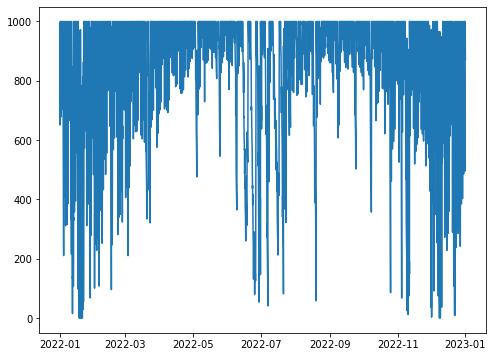

In [169]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(ds["T"]);

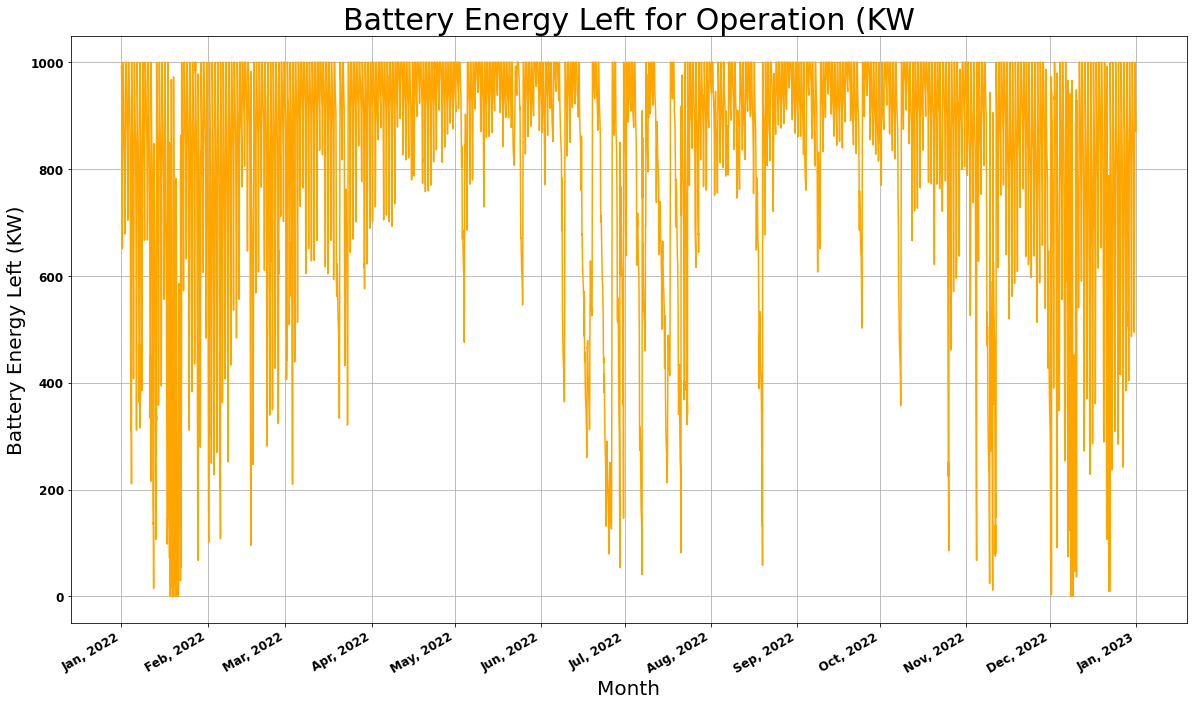

In [181]:
fig, ax = plt.subplots(figsize=(20, 12))

monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(monthly_locator)
#ax.xaxis.set_minor_locator(monthly_locator()
ax.xaxis.set_major_formatter(month_year_formatter)
ax.plot(ds["T"], color = "orange")
plt.xticks(fontsize=12,weight = 'bold')
plt.yticks(fontsize=12,weight = 'bold')
plt.title("Battery Energy Left for Operation (KW",fontsize=30)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Battery Energy Left (KW)",fontsize=20)
plt.grid()

fig.autofmt_xdate()




In [150]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format. Will be clear in Screenshot

In [114]:
import matplotlib.dates as mdates
month_year_formatter = mdates.DateFormatter('%b, %Y') # The "," is intentional.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(date, value);

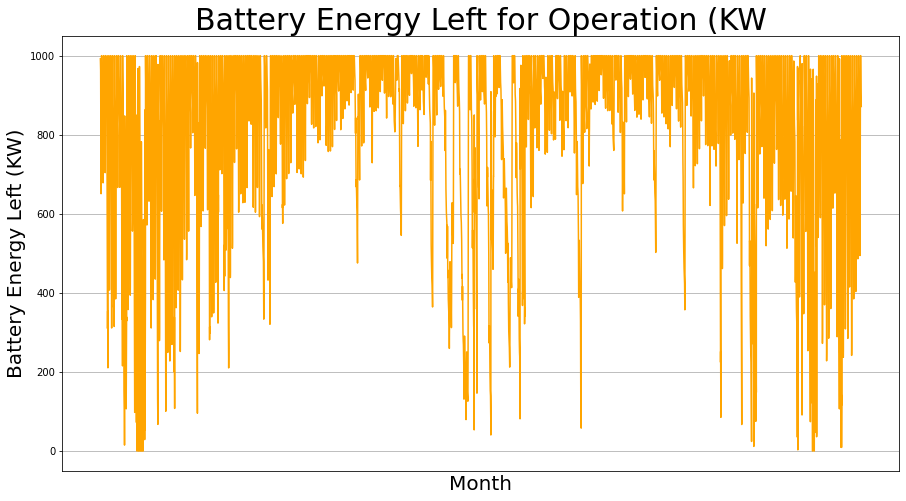

In [168]:
plt.figure(figsize=(15,8))

#years = mdates.YearLocator()
#months = mdates.MonthLocator()
#monthsFmt = mdates.DateFormatter('%B')
#yearsFmt = mdates.DateFormatter('\n%Y')


plt.title("Battery Energy Left for Operation (KW",fontsize=30)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Battery Energy Left (KW)",fontsize=20)
plt.grid()

display(plt.plot(ds["T"],color = "orange"))

In [ ]:
df[df["month"] == 2]

In [ ]:
df.to_excel('/content/Data.xlsx')

# **Splitting to Winter & Summer Profile**

In [ ]:
winter = [10,11,12,1,2,3,4]

In [ ]:
winter = ["Oct","Nov","Dec","Jan","Feb","Mar"]

In [ ]:
df_winter = df[df['month'].isin(winter)]

In [ ]:
df_winter

,Electricity (kW),Elctricity Generated (kW),year,month,Net,Battery_Residual,Energy_Used,Battery_Left,Defibrillator_Value,ll,Offset_Amount,Battery_Recharge
Date,,,,,,,,,,,,
2022-01-01 00:30:00,7.8,0.0,2022,1,7.8,0.0,7.8,992.200000,0.000000,0,0,0.000000
2022-01-01 01:30:00,8.5,0.0,2022,1,8.5,0.0,8.5,983.700000,0.000000,0,0,0.000000
2022-01-01 02:30:00,9.4,0.0,2022,1,9.4,0.0,9.4,974.300000,0.000000,0,0,0.000000
2022-01-01 03:30:00,11.6,0.0,2022,1,11.6,0.0,11.6,962.700000,0.000000,0,0,0.000000
2022-01-01 04:30:00,56.1,0.0,2022,1,56.1,0.0,56.1,906.600000,0.000000,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:30:00,21.8,0.0,2022,12,21.8,0.0,21.8,-8656.194163,-8656.194163,9,9000,343.805837
2022-12-31 20:30:00,15.9,0.0,2022,12,15.9,0.0,15.9,-8672.094163,-8672.094163,9,9000,327.905837
2022-12-31 21:30:00,16.0,0.0,2022,12,16.0,0.0,16.0,-8688.094163,-8688.094163,9,9000,311.905837


In [ ]:
df_winter.groupby(['month']).sum()

In [ ]:
# df_winter_s

In [ ]:
wms = input ("Enter the winter mid peak time start:" ) # winter mid start [16:00]
wme = input ("Enter the winter mid peak time end:" )   # winter mid end  [8:00]

Enter the winter mid peak time start:08:00
Enter the winter mid peak time end:16:00


In [ ]:
sms = input ("Enter the winter super off peak time start:" ) #super off peak start
sme = input ("Enter the winter super off peak time end:" )#super off peak end

In [ ]:
#df = df.iloc[df.index.indexer_between_time('12:30', '18:30')]

In [ ]:
df_winter_peak = df_winter.iloc[df_winter.index.indexer_between_time(wms,wme)]

In [ ]:
df_winter_peak_1 = df.groupby(['month']).sum()

In [ ]:
df_winter_peak_1

,Electricity (kW),Elctricity Generated (kW),year,Net,Battery_Residual,Energy_Used,Battery_Left,Defibrillator_Value,ll,Offset_Amount,Battery_Recharge
month,,,,,,,,,,,
1,45075.0,-37637.029618,1504368,7437.970382,15380.778939,22818.749321,-3.086146e+06,-3.162309e+06,3487,3487000,324690.873791
2,38231.5,-42616.721666,1358784,-4385.221666,20612.539256,16227.317590,-4.970371e+06,-4.970371e+06,5289,5289000,318629.475999
3,33639.1,-49751.744275,1504368,-16112.644275,27823.452640,11710.808365,-3.646138e+05,-8.106543e+05,916,916000,105345.701513
4,26737.8,-55423.937721,1455840,-28686.137721,34532.878438,5846.740717,7.056633e+05,0.000000e+00,0,0,0.000000
5,25382.5,-53953.448073,1504368,-28570.948073,33112.634898,4541.686825,7.211595e+05,0.000000e+00,0,0,0.000000
6,38166.1,-50300.329933,1455840,-12134.229933,19241.042535,7106.812602,5.072477e+05,-2.001126e+04,40,40000,19988.742838
7,47004.3,-52390.288385,1504368,-5385.988385,14593.877682,9207.889297,4.699028e+04,-1.939996e+05,425,425000,231000.378407
8,40549.0,-54353.175960,1504368,-13804.175960,19778.509721,5974.333761,6.292059e+05,-6.764558e+03,40,40000,33235.441577
9,28841.7,-50671.583201,1455840,-21829.883201,26597.898584,4768.015383,6.876970e+05,0.000000e+00,0,0,0.000000


In [ ]:
#df_winter_peak = df_winter.between_time(wms,wme)

In [ ]:
df_winter_nopeak = df_winter.between_time(sms,sme)

In [ ]:
df_winter_offpeak = df_winter.between_time(wme,sms)

In [ ]:
df_winter_peak_1 = df.groupby(['Month']).sum()
df_winter_nopeak_1 = df_winter_nopeak.groupby(['Month']).sum()
df_winter_offpeak_1 = df_winter_offpeak.groupby(['Month']).sum()

In [ ]:
df_winter_max_midpeak = df_winter.between_time("16:15","16:30")
df_winter_max_offpeak = df_winter.between_time("21:30","21:45")
df_winter_max_superoffpeak = df_winter.between_time("13:15","13:30")

In [ ]:
df_winter_max_midpeak

In [ ]:
# peak = np.where((df_winter_max_midpeak["N_BD.aps"]>0.64) & (df["Time"]<0.9))[0]
# dSC_2 = df["N_DD_SC I.aps"][peak]

In [ ]:
df_winter_peak.head(10)

In [ ]:
df_winter_nopeak.head(20)

In [ ]:
# df_peak = df.between_time("16:00", "21:00")

In [ ]:
#df_peak.head(3)

In [ ]:
df_winter_peak_1 = df_winter_peak.groupby(['Month']).sum()
df_winter_nopeak_1 = df_winter_nopeak.groupby(['Month']).sum()
df_winter_offpeak_1 = df_winter_offpeak.groupby(['Month']).sum()

In [ ]:
df_winter_max_midpeak_1 = df_winter_max_midpeak.groupby(['Month']).sum() 
df_winter_max_offpeak_1 = df_winter_max_offpeak.groupby(['Month']).sum() 
df_winter_max_superoffpeak_1 = df_winter_max_superoffpeak.groupby(['Month']).sum()

# **Pricing**

In [ ]:
# df_winter_peak_1["Delivery charge"] = df_winter_peak_1["N_DD_SC II.aps"]*0.02044* 0.293071 # convert kBtu to Kwh

In [ ]:
# Mid Peak
price_columns = [column for column in df_winter_peak_1]
for column in df_winter_peak_1:
    col_pd = df_winter_peak_1[price_columns].multiply(0.09436 * 0.293071, axis="index")

In [ ]:
# Off peak
price_columns_2 = [column for column in df_winter_offpeak_1]
for column in df_winter_offpeak_1:
    col_pd_2 = df_winter_offpeak_1[price_columns_2].multiply(0.08261 * 0.293071, axis="index")

In [ ]:
price_winter_peak_1 = col_pd.rename({'N_BD.aps': 'N_BD Price_peak', 'N_DX.aps': 'N_DX Price_peak','N_CP.aps': 'N_CP Price_peak'}, axis=1)

In [ ]:
price_winter_offpeak_1 = col_pd_2.rename({'N_BD.aps': 'N_BD Price_offpeak', 'N_DX.aps': 'N_DX Price_offpeak','N_CP.aps': 'N_CP Price_offpeak'}, axis=1)

In [ ]:
price_winter_offpeak_1.head(3) 

In [ ]:
price_winter_peak_1.head(3)

In [ ]:
result = pd.concat([price_winter_offpeak_1, price_winter_peak_1], axis=1)

In [ ]:
result

In [ ]:
qqq = result[["N_BD Price_offpeak","N_BD Price_peak"]]

In [ ]:
qqq.head()

In [ ]:
qqq["total price"] = qqq["N_BD Price_offpeak"] + qqq["N_BD Price_peak"]

In [ ]:
qqq.head()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
qqq.plot.bar()

In [ ]:
df_winter_max_midpeak_1.head()

In [ ]:
for column in df_winter_max_midpeak_1 :
    price = df_winter_max_midpeak_1[df_winter_max_midpeak_1_columns].multiply(2.92 * 0.293071, axis="index")

In [ ]:
df_winter_max_midpeak_1 
df_winter_max_offpeak_1 
df_winter_max_superoffpeak_1

In [ ]:
price_winter_peak_1.plot()

In [ ]:
df_winter_peak_1

In [ ]:
df_winter_peak_1.plot(figsize = (20,16))

In [ ]:
# np.where((df["Time"]> start_date.hour) & (df["Time"]< end_date.hour))

In [ ]:
# np.where((df["Time"]>0.64) & (df["Time"]<0.9))

In [ ]:
# peak = np.where((df["Time"]>0.64) & (df["Time"]<0.9))[0]
# dSC_2 = df["N_DD_SC I.aps"][peak]
#dSC_22 = df["Month"][peak]
# dSC_2.to_excel("peak_values_2.xlsx",
             #sheet_name='Sheet_name_1')
#dSC_22.to_excel("peak_month_2.xlsx",
            # sheet_name='Sheet_name_1')

In [ ]:
# nopeak_1 = np.where((df["Time"]< 0.64))[0]

In [ ]:
# nopeak_2 = np.where((df["Time"]>0.9))[0]

In [ ]:
#nopeak_1_kbtu  = df["N_DD_SC I.aps"][nopeak_1]
#nopeak_1_month = df["Month"][nopeak_1]
#nopeak_2_kbtu  = df["N_DD_SC I.aps"][nopeak_2]
#nopeak_2_month = df["Month"][nopeak_2]

In [ ]:
#dx_1 = pd.concat([nopeak_1_kbtu, nopeak_1_month], axis = 1)

In [ ]:
#dx_2 = pd.concat([nopeak_2_kbtu, nopeak_2_month], axis = 1)

In [ ]:
#dx_1.head()

In [ ]:
#da_1 = dx_1.groupby(['Month']).sum()

In [ ]:
#da_2 = dx_2.groupby(['Month']).sum()

In [ ]:
#da_1

In [ ]:
#da_2

In [ ]:
# df_2 = pd.merge(dSC_2, dSC_22, on="movie_title")

In [ ]:
#dt = pd.concat([dSC_2, dSC_22], axis = 1)

In [ ]:
#dt

In [ ]:
#dq = dt.groupby(['Month']).sum()

In [ ]:
#dq

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#dq.plot(figsize = (20,10))

In [ ]:
#da_1.plot(figsize = (20,10))


In [ ]:
#da_2.plot(figsize = (20,10))

In [ ]:
#df_1.head()

In [ ]:
#dc = pd.read_excel("/content/peak_price.xlsx")
#dc.head()

In [ ]:
#dc.describe()

In [ ]:
#dc[dc['Month'] == "Jan"].describe()

In [ ]:
#x = dc.groupby('Month')['N_DD_SC I.aps'].sum()

In [ ]:
#dc.groupby(['Month']).sum()

In [ ]:
x.to_excel("/content/peak_month_sum_2.xlsx")

In [ ]:
dc[dc['Month'] == "Jan"]["N_DD_SC II.aps"].sum()

In [ ]:
y = dc.groupby(['Month']).max()

In [ ]:
y.to_excel("/content/SC2_on_demand_charges.xlsx")